In [1]:
# WeatherPy

In [ ]:
## Set Dependencies

In [99]:
#### Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

#### Import API key
from config import api_key

#### Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#### Output File (CSV)
output_data_file = "output_data/cities.csv"

#### Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
## Generate Cities List

In [100]:
#### List for holding lat_lngs and cities
lat_lngs = []
cities = []

#### Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#### Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #### If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#### Print the city count to confirm sufficient count
len(cities)

594

In [ ]:
## Perform API Calls

In [101]:
#### URL to get request 
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "units=Imperial"
api = "&APPID=" + api_key

In [102]:
#### Creating variables for response code then print response code to the console
response = requests.get(url + unit + api).json()
print(response)

{'cod': '400', 'message': 'Nothing to geocode'}


In [103]:
#### Creating dictionary for data to be stored from the api calls
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}

MINUTE = 60

In [104]:
#### Decorator that limits "call_api" function to 60 api calls per minute
def call_api():
    
    #### Creating a loop that repeats an api call with dynamic endpoints then adds data retrieved from each api call into "city_data" dictionary
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()

        try:
            print("Processing city " + str(i) + ": " + city["name"])

            city_data["City"].append(city["name"])
            city_data["Lat"].append(city["coord"]["lat"])
            city_data["Lng"].append(city["coord"]["lon"])
            city_data["Max Temp"].append(city["main"]["temp_max"])
            city_data["Humidity"].append(city["main"]["humidity"])
            city_data["Cloudiness"].append(city["clouds"]["all"])
            city_data["Wind Speed"].append(city["wind"]["speed"])
            city_data["Country"].append(city["sys"]["country"])
            city_data["Date"].append(city["dt"])

        except:
            print("Incomplete record. Skipping city instance...")
            pass
    print("Data retrieval is complete.")
    
call_api()

Processing city 0: Busselton
Processing city 1: Port Alfred
Processing city 2: Mamit
Processing city 3: Carnarvon
Processing city 4: Tiksi
Processing city 5: Labuhan
Incomplete record. Skipping city instance...
Processing city 7: Mataura
Processing city 8: Kahului
Processing city 9: Atuona
Processing city 10: Saint-Philippe
Processing city 11: Havre-St-Pierre
Processing city 12: Slavyanka
Processing city 13: Rikitea
Processing city 14: Ushuaia
Processing city 15: Dubovka
Processing city 16: Andenes
Processing city 17: Narsaq
Processing city 18: Pozo Colorado
Processing city 19: Bathsheba
Processing city 20: Hermanus
Processing city 21: Iquitos
Processing city 22: Āsasa
Processing city 23: New Norfolk
Processing city 24: Rincon
Processing city 25: Dikson
Processing city 26: Kapaa
Processing city 27: Yellowknife
Processing city 28: Hobart
Processing city 29: Kaitangata
Processing city 30: Nome
Processing city 31: Kade
Processing city 32: Cape Town
Processing city 33: Castro
Processing ci

Processing city 261: Leningradskiy
Processing city 262: Mitsamiouli
Processing city 263: Massaguet
Processing city 264: Parrita
Processing city 265: High Level
Processing city 266: Buala
Processing city 267: Cairns
Processing city 268: Kaeo
Incomplete record. Skipping city instance...
Processing city 270: Lasem
Processing city 271: Bellevue
Processing city 272: Rawson
Processing city 273: Tsabong
Incomplete record. Skipping city instance...
Processing city 275: Namatanai
Incomplete record. Skipping city instance...
Processing city 277: Praia da Vitória
Processing city 278: Kieta
Incomplete record. Skipping city instance...
Processing city 280: Lerwick
Processing city 281: Beloha
Processing city 282: Buchanan
Processing city 283: Vila Velha
Processing city 284: Tuatapere
Processing city 285: Asău
Processing city 286: Ishigaki
Processing city 287: Pevek
Processing city 288: Kiryat Gat
Processing city 289: Hakui
Processing city 290: Bandarbeyla
Processing city 291: Galle
Processing city 2

Processing city 524: Vanavara
Processing city 525: Chara
Processing city 526: Ulaangom
Processing city 527: Hay River
Processing city 528: Vestmannaeyjar
Incomplete record. Skipping city instance...
Processing city 530: Hūn
Processing city 531: Chui
Processing city 532: Sabang
Processing city 533: Tambovka
Processing city 534: Noumea
Processing city 535: Santa Isabel Rio Negro
Incomplete record. Skipping city instance...
Processing city 537: Dunedin
Processing city 538: Nikel
Processing city 539: Aquiraz
Processing city 540: Jieshi
Processing city 541: Gonder
Processing city 542: Humaitá
Processing city 543: Carutapera
Processing city 544: Khandyga
Processing city 545: Northam
Processing city 546: Vrangel'
Processing city 547: Itarema
Processing city 548: Vitória da Conquista
Processing city 549: Jinxiang
Processing city 550: San Jose
Processing city 551: Sembakung
Processing city 552: Nioro
Processing city 553: Darnah
Processing city 554: Rodino
Processing city 555: Charters Towers
Pr

In [ ]:
## Converting Raw Data into a DataFrame

In [105]:
#### Creating table/DataFrame from the "city_data" dictionary
city_data_df = pd.DataFrame(city_data)

#### Exporting DataFrame as a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,54.00,54,0,10.56,AU,1603916711
1,Port Alfred,-33.59,26.89,66.22,86,86,2.71,ZA,1603916711
2,Mamit,23.93,92.48,68.05,99,21,1.30,IN,1603916711
3,Carnarvon,-24.87,113.63,68.00,94,0,13.87,AU,1603916711
4,Tiksi,71.69,128.87,0.70,91,99,18.32,RU,1603916711


In [ ]:
## Plotting the Data

In [ ]:
### Latitude vs. Temperature Plot

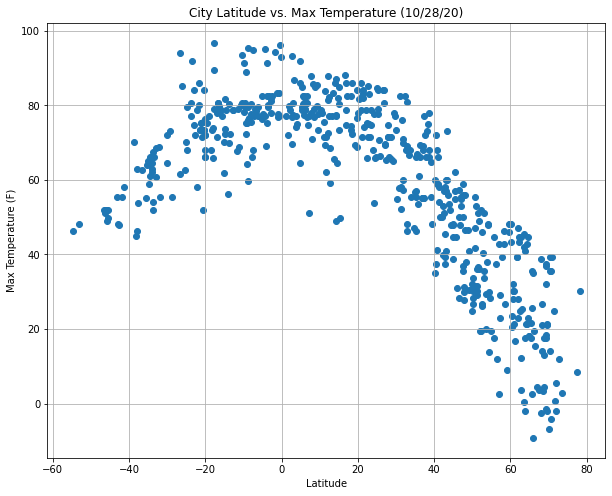

The code is to generate a scattered plot to show relationship between the dataset.


In [106]:
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.figure(figsize=(10,8))
plt.scatter(lat, max_temp, linewidths=1, marker="o")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Images/fig1.png")
plt.show()
print("The code is to generate a scattered plot to show relationship between the dataset.")

In [ ]:
### Latitude vs Humidity Plot

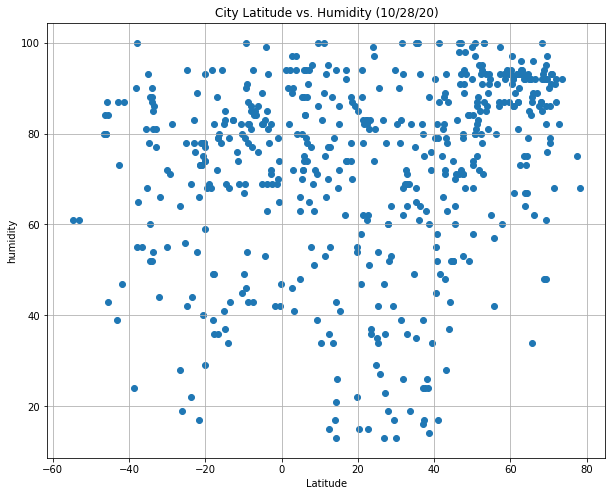

Above scattered plot does not show relationship between the datasets.


In [107]:
plt.figure(figsize=(10,8))
plt.scatter(lat, humidity, linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(True)
plt.savefig("Images/fig2.png")
plt.show()
print("Above scattered plot does not show relationship between the datasets.")

In [ ]:
### Latitude vs Cloudiness Plot

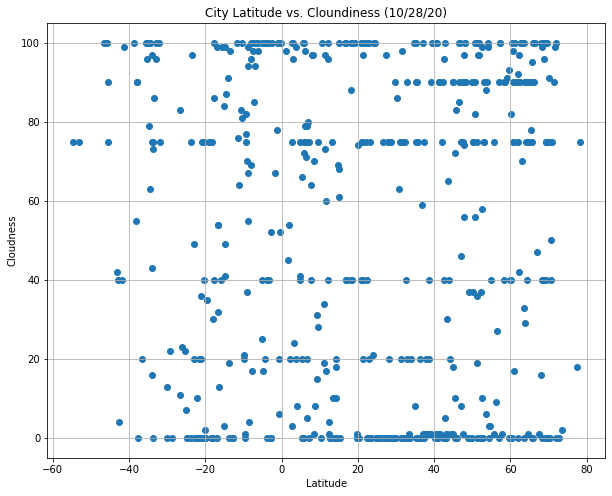

Above scattered plots shows no relation between the latitude vs cloudiness.


In [108]:
plt.figure(figsize=(10,8))
plt.scatter(lat, cloudiness, linewidths=1, marker="o")
plt.title("City Latitude vs. Cloundiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudness")
plt.grid(True)
plt.savefig("Images/fig3.png")
plt.show()
print("Above scattered plots shows no relation between the latitude vs cloudiness.")

In [ ]:
### Latitude vs Wind Speed Plot

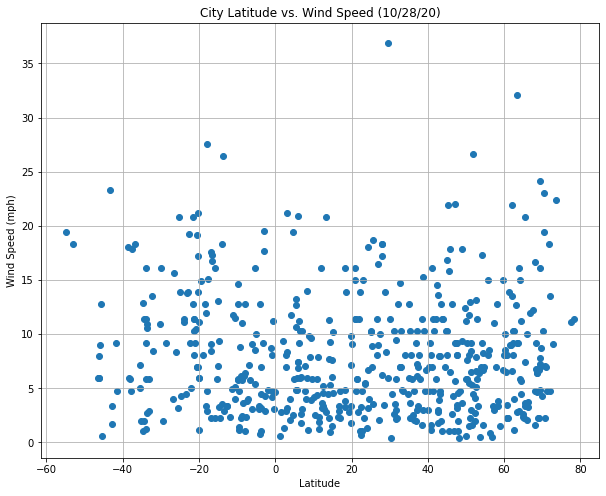

The plot shows low wind speed across as we move closer or farther away from the equator.
No direct correlation can be seen.


In [109]:
plt.figure(figsize=(10,8))
plt.scatter(lat, wind_speed, linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Images/fig4.png")
plt.show()
print("The plot shows low wind speed across as we move closer or farther away from the equator.")
print("No direct correlation can be seen.")

In [ ]:
## Linear Regressions

In [110]:
#### creating two dataframes to run linear regressions

northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
#### northern_df.head()
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]
#### southern_df.head()

In [ ]:
### Linear Regression for Northern Hemisphere: Temp. vs Latitude

Regression line equation is: y = -1.03x + 92.44


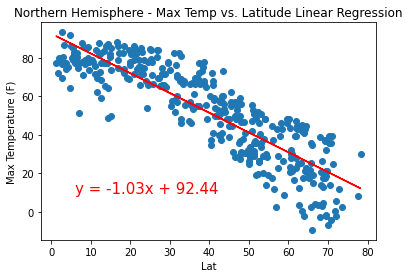

The r-squared is: -0.8730104837935906
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


In [111]:
#### create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Images/fig5.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")

In [ ]:
### Linear Regression for Southern Hemisphere: Temp. vs Latitude

Regression line equation is: y = 0.67x + 85.46


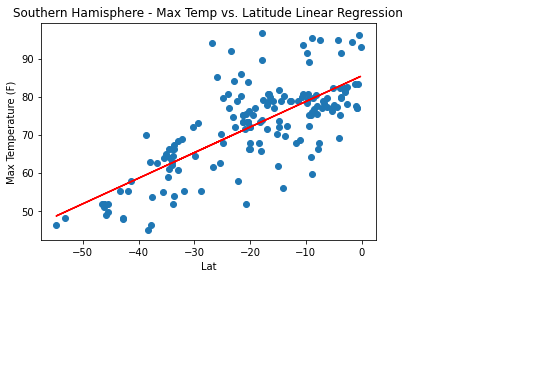

The r-squared is: 0.7431439280567091
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


In [112]:
#### create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hamisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Images/fig6.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")

In [ ]:
### Linear Regression for Northern Hemisphere: Humidity vs Latitude

Regression line equation is: y = 0.28x + 62.38


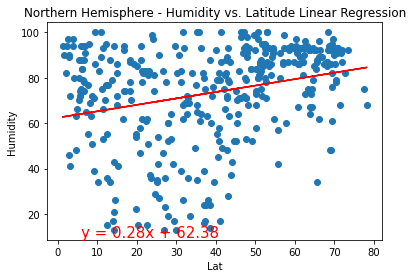

The r-squared is: 0.2683125233947445
In the nothern hemisphere, data does not show much of a correlation between latitude and humidity.


In [113]:
#### create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("Images/fig7.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In the nothern hemisphere, data does not show much of a correlation between latitude and humidity.")

In [ ]:
### Linear Regression for Southern Hemisphere: Humidity vs Latitude

Regression line equation is: y = 0.09x + 71.68


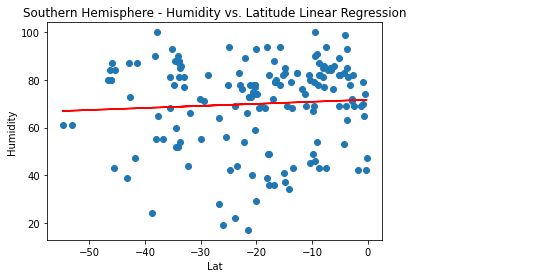

The r-squared is: 0.06227115776040604
In Southern hemisphere, data does not show any correlation between Latitude and Humidity


In [114]:
#### create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("Images/fig8.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In Southern hemisphere, data does not show any correlation between Latitude and Humidity")


In [ ]:
### Linear Regression for Northern Hemisphere: Cloudiness vs Latitude

Regression line equation is: y = 0.24x + 39.9


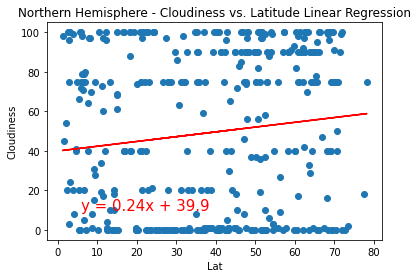

The r-squared is: 0.12506005142303075
In the nothern hemisphere, data does not show much of a correlation between latitude and Cloudiness.


In [115]:
#### create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("Images/fig9.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In the nothern hemisphere, data does not show much of a correlation between latitude and Cloudiness.")

In [ ]:
### Linear Regression for Southern Hemisphere: Cloudiness vs Latitude

Regression line equation is: y = -0.14x + 51.13


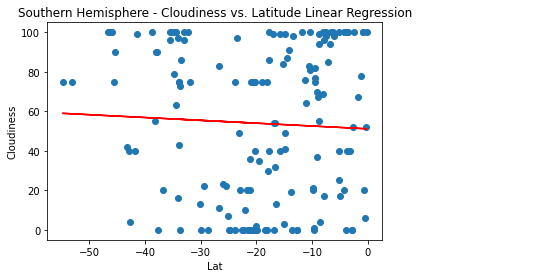

The r-squared is: -0.048233208591697115
In Southern hemisphere, data does not show much of a correlation between Latitude and Cloudiness


In [116]:
#### create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("Images/fig10.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In Southern hemisphere, data does not show much of a correlation between Latitude and Cloudiness")

In [ ]:
### Linear Regression for Northern Hemisphere: Wind Speed vs Latitude

Regression line equation is: y = 0.03x + 6.54


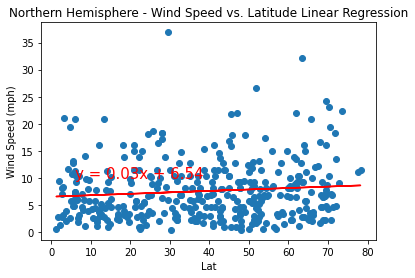

The r-squared is: 0.10195887369908409
In the nothern hemisphere, data does not show much of a correlation between latitude and Wind Speed.


In [117]:
#### create linear regression chart for Northern Hemisphere Wind Speed  vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("Images/fig11.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In the nothern hemisphere, data does not show much of a correlation between latitude and Wind Speed.")

In [ ]:
### Linear Regression for Southern Hemisphere: Wind Speed vs Latitude

Regression line equation is: y = -0.07x + 7.2


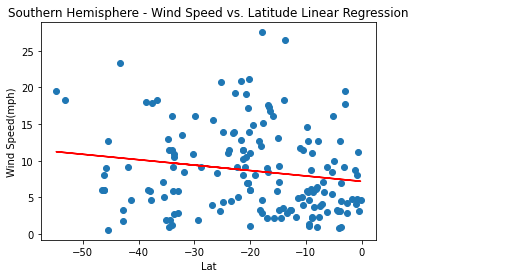

The r-squared is: -0.16662214847696186
In Southern hemisphere, data does not show much of a correlation between Latitude and Wind Speed


In [118]:
#### create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("Images/fig12.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In Southern hemisphere, data does not show much of a correlation between Latitude and Wind Speed")